# Correlation Matrix Between Launchit and Launchit_info Tables

In [24]:
# Import dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

In [25]:
# Import local files to Google Colab
from google.colab import files
uploaded = files.upload()

Saving config.py to config (2).py


In [26]:
from config import db_password

In [27]:
# Establish connection to AWS server
import psycopg2
connection = psycopg2.connect(
    host = 'launch-it-1.cyo6pvehqvyz.us-east-1.rds.amazonaws.com',
    port = 5432,
    user = 'postgres',
    password = db_password,
    database='launch-it-1'
    )
cursor=connection.cursor()

In [28]:
# Pull SQL dataset from database - Launchit Table
sql = """
SELECT * FROM launchit  
"""

# Build dataframe from SQL data
stock_data = pd.read_sql(sql, con=connection)
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,TCKR
0,2019-12-31,87.300003,87.300003,64.904999,71.699997,71.699997,33947.0,MKDTY
1,2020-01-02,72.900002,72.900002,62.250000,65.550003,65.550003,13607.0,MKDTY
2,2020-01-03,63.299999,66.750000,63.299999,65.250000,65.250000,4427.0,MKDTY
3,2020-01-06,65.550003,72.000000,63.750000,67.650002,67.650002,9933.0,MKDTY
4,2020-01-07,68.250000,72.419998,68.099998,72.000000,72.000000,8347.0,MKDTY


In [29]:
# Pull SQL dataset from database - Launchit_info Table
sql = """
SELECT * FROM launchit_info 
"""

# Build dataframe from SQL data
info_data = pd.read_sql(sql, con=connection)
info_data.head()

,TCKR,sector,industry,country,growth_rate,debtToEquity,currentRatio,forwardPE
0,MKDTY,Basic Materials,Chemicals,China,-0.671,NaN,0.928,-0.002444
1,INDO,Energy,Oil & Gas E&P,Indonesia,1.206,12.272,2.707,-9.695652
2,MNPR,Healthcare,Biotechnology,United States,NaN,0.167,7.508,-2.596638
3,OCFT,Technology,Software—Application,China,0.004,9.305,1.241,-3.550454
4,SPT,Technology,Software—Application,United States,0.330,16.084,1.886,-3289.500000


In [30]:
# Merge the stock_data and info_data
data_all = stock_data.merge(info_data, how='left', left_on='TCKR', right_on='TCKR')
data_all

,Date,Open,High,Low,Close,Adj Close,Volume,TCKR,sector,industry,country,growth_rate,debtToEquity,currentRatio,forwardPE
0,2019-12-31,87.300003,87.300003,64.904999,71.699997,71.699997,33947.0,MKDTY,Basic Materials,Chemicals,China,-0.671,NaN,0.928,-0.002444
1,2020-01-02,72.900002,72.900002,62.250000,65.550003,65.550003,13607.0,MKDTY,Basic Materials,Chemicals,China,-0.671,NaN,0.928,-0.002444
2,2020-01-03,63.299999,66.750000,63.299999,65.250000,65.250000,4427.0,MKDTY,Basic Materials,Chemicals,China,-0.671,NaN,0.928,-0.002444
3,2020-01-06,65.550003,72.000000,63.750000,67.650002,67.650002,9933.0,MKDTY,Basic Materials,Chemicals,China,-0.671,NaN,0.928,-0.002444
4,2020-01-07,68.250000,72.419998,68.099998,72.000000,72.000000,8347.0,MKDTY,Basic Materials,Chemicals,China,-0.671,NaN,0.928,-0.002444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649721,2022-11-08,10.270000,10.270000,10.270000,10.270000,10.270000,1500.0,CITE,Financial Services,Shell Companies,United States,NaN,NaN,9.277,NaN
649722,2022-11-09,10.260000,10.260000,10.230000,10.230000,10.230000,3500.0,CITE,Financial Services,Shell Companies,United States,NaN,NaN,9.277,NaN
649723,2022-11-10,10.230000,10.280000,10.230000,10.280000,10.280000,27400.0,CITE,Financial Services,Shell Companies,United States,NaN,NaN,9.277,NaN
649724,2022-11-11,10.280000,10.280000,10.280000,10.280000,10.280000,0.0,CITE,Financial Services,Shell Companies,United States,NaN,NaN,9.277,NaN


In [31]:
# Put the industry names in a list.
industries = pd.unique(data_all['industry']).tolist()
industries

['Chemicals',
 'Oil & Gas E&P',
 'Biotechnology',
 'Software—Application',
 'Aerospace & Defense',
 'Capital Markets',
 'Auto & Truck Dealerships',
 'REIT—Retail',
 'Computer Hardware',
 'Semiconductors',
 'Rental & Leasing Services',
 'Internet Content & Information',
 'Specialty Retail',
 'Medical Devices',
 'Diagnostics & Research',
 'Banks—Regional',
 'Real Estate Services',
 'Medical Care Facilities',
 'Education & Training Services',
 'Packaged Foods',
 'Health Information Services',
 'Insurance Brokers',
 'Credit Services',
 'Leisure',
 None,
 'Medical Instruments & Supplies',
 'Software—Infrastructure',
 'Information Technology Services',
 'Asset Management',
 'Restaurants',
 'Drug Manufacturers—Specialty & Generic',
 'Oil & Gas Drilling',
 'Electronic Gaming & Multimedia',
 'Solar',
 '',
 'Shell Companies',
 'Broadcasting',
 'Luxury Goods',
 'Communication Equipment',
 'Grocery Stores',
 'Internet Retail',
 'Specialty Chemicals',
 'REIT—Office',
 'Staffing & Employment Service

In [32]:
# Remove 'None' from industries list
industries= industries.remove(None)
industries

In [33]:
data_all = data_all.set_index(['Date'])
data_all

,Open,High,Low,Close,Adj Close,Volume,TCKR,sector,industry,country,growth_rate,debtToEquity,currentRatio,forwardPE
Date,,,,,,,,,,,,,,
2019-12-31,87.300003,87.300003,64.904999,71.699997,71.699997,33947.0,MKDTY,Basic Materials,Chemicals,China,-0.671,NaN,0.928,-0.002444
2020-01-02,72.900002,72.900002,62.250000,65.550003,65.550003,13607.0,MKDTY,Basic Materials,Chemicals,China,-0.671,NaN,0.928,-0.002444
2020-01-03,63.299999,66.750000,63.299999,65.250000,65.250000,4427.0,MKDTY,Basic Materials,Chemicals,China,-0.671,NaN,0.928,-0.002444
2020-01-06,65.550003,72.000000,63.750000,67.650002,67.650002,9933.0,MKDTY,Basic Materials,Chemicals,China,-0.671,NaN,0.928,-0.002444
2020-01-07,68.250000,72.419998,68.099998,72.000000,72.000000,8347.0,MKDTY,Basic Materials,Chemicals,China,-0.671,NaN,0.928,-0.002444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-08,10.270000,10.270000,10.270000,10.270000,10.270000,1500.0,CITE,Financial Services,Shell Companies,United States,NaN,NaN,9.277,NaN
2022-11-09,10.260000,10.260000,10.230000,10.230000,10.230000,3500.0,CITE,Financial Services,Shell Companies,United States,NaN,NaN,9.277,NaN
2022-11-10,10.230000,10.280000,10.230000,10.280000,10.280000,27400.0,CITE,Financial Services,Shell Companies,United States,NaN,NaN,9.277,NaN


In [34]:
# Calculate the correlation
df_corr = data_all.corr()
df_corr

,Open,High,Low,Close,Adj Close,Volume,growth_rate,debtToEquity,currentRatio,forwardPE
Open,1.000000,0.993766,0.997127,0.995781,0.995642,0.071383,0.031631,-0.019709,-0.008614,-0.015894
High,0.993766,1.000000,0.989727,0.994782,0.994669,0.073806,0.031711,-0.020096,-0.008456,-0.016348
Low,0.997127,0.989727,1.000000,0.997469,0.997306,0.069710,0.031310,-0.019239,-0.008687,-0.015379
Close,0.995781,0.994782,0.997469,1.000000,0.999856,0.072350,0.031810,-0.019728,-0.008630,-0.015881
Adj Close,0.995642,0.994669,0.997306,0.999856,1.000000,0.072228,0.031981,-0.020599,-0.008561,-0.015946
Volume,0.071383,0.073806,0.069710,0.072350,0.072228,1.000000,-0.006217,-0.007644,-0.007927,-0.007560
growth_rate,0.031631,0.031711,0.031310,0.031810,0.031981,-0.006217,1.000000,-0.010951,0.016158,-0.005503
debtToEquity,-0.019709,-0.020096,-0.019239,-0.019728,-0.020599,-0.007644,-0.010951,1.000000,-0.082880,-0.032735
currentRatio,-0.008614,-0.008456,-0.008687,-0.008630,-0.008561,-0.007927,0.016158,-0.082880,1.000000,-0.019942
forwardPE,-0.015894,-0.016348,-0.015379,-0.015881,-0.015946,-0.007560,-0.005503,-0.032735,-0.019942,1.000000


In [35]:
# Plot only a half matrix
np.ones_like(df_corr, dtype=np.bool)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

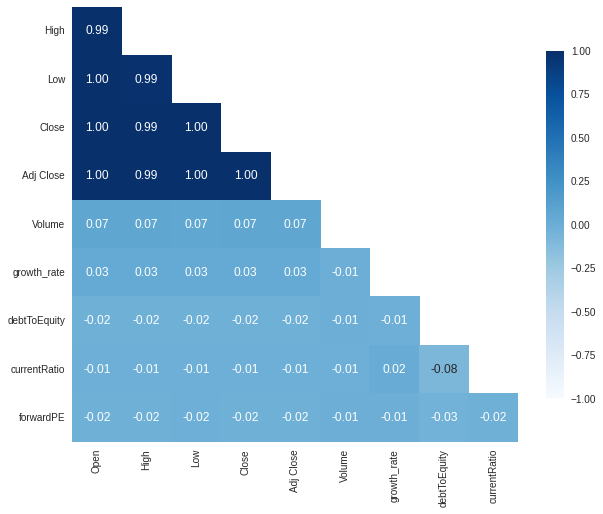

In [36]:
# Plot using Seaborn
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

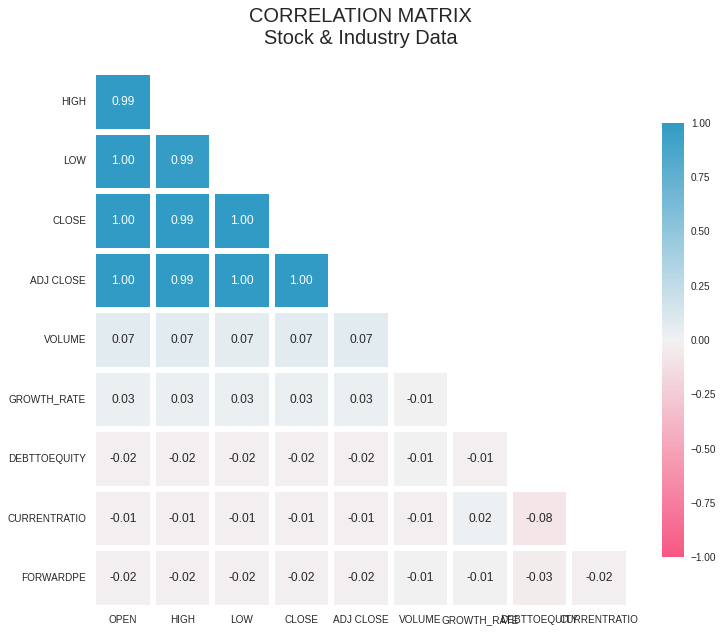

In [37]:

fig, ax = plt.subplots(figsize=(12, 10))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# color map
cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX\nStock & Industry Data\n'
plt.title(title, fontsize=20)
plt.show()

# Regression Machine Learning Model Using PyCaret

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.
Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.
The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.

In [32]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.2 MB/s 
     |████████████████████████████████| 25.9 MB 63.5 MB/s 
     |████████████████████████████████| 1.7 MB 58.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.3 MB 35.3 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 325 kB 71.4 MB/s 
     |████████████████████████████████| 1.3 MB 56.3 MB/s 
     |████████████████████████████████| 88 kB 6.9 MB/s 
     |████████████████████████████████| 6.8 MB 28.3 MB/s 
     |████████████████████████████████| 636 kB 57.4 MB/s 
     |████████████████████████████████| 167 kB 39.3 MB/s 
     |████████████████████████████████| 4.8 MB 41.3 MB/s 
     |████████████████████████████████| 

In [1]:
# Import dependencies
from pycaret.regression import *
import pandas as pd
import numpy as np 
import psycopg2


In [2]:
# Import local files to Google Colab
from google.colab import files
uploaded = files.upload()

Saving config.py to config (1).py


In [3]:
from config import db_password

In [4]:
# Create connection to AWS database

connection = psycopg2.connect(
    host = 'launch-it-1.cyo6pvehqvyz.us-east-1.rds.amazonaws.com',
    port = 5432,
    user = 'postgres',
    password = db_password,
    database='launch-it-1'
    )
cursor=connection.cursor()

In [5]:
# Using pandas to execute SQL queries
sql = """
SELECT * from launchit_targets
"""
target_df = pd.read_sql(sql, con=connection)
target_df.head()

,industry,revenue_growth,ROI
0,Chemicals,-0.671000,405.920777
1,Oil & Gas E&P,1.132000,-0.055017
2,Biotechnology,42.906051,-0.075611
3,Software—Application,1.784160,0.017946
4,Aerospace & Defense,2.395333,2.018068


In [6]:
# Check Data Types for all columns
target_df.dtypes

industry           object
revenue_growth    float64
ROI               float64
dtype: object

In [7]:
# Calculate the correlation
target_df.corr()

,revenue_growth,ROI
revenue_growth,1.000000,-0.026481
ROI,-0.026481,1.000000


PyCaret’s Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the ‘outcome variable’, or ‘target’) and one or more independent variables (often called ‘features’, ‘predictors’, or ‘covariates’). The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. It provides several pre-processing features that prepare the data for modeling through the setup function. It has over 25 ready-to-use algorithms and several plots to analyze the performance of trained models.

Setup:

This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes two mandatory parameters: data and target. All the other parameters are optional.

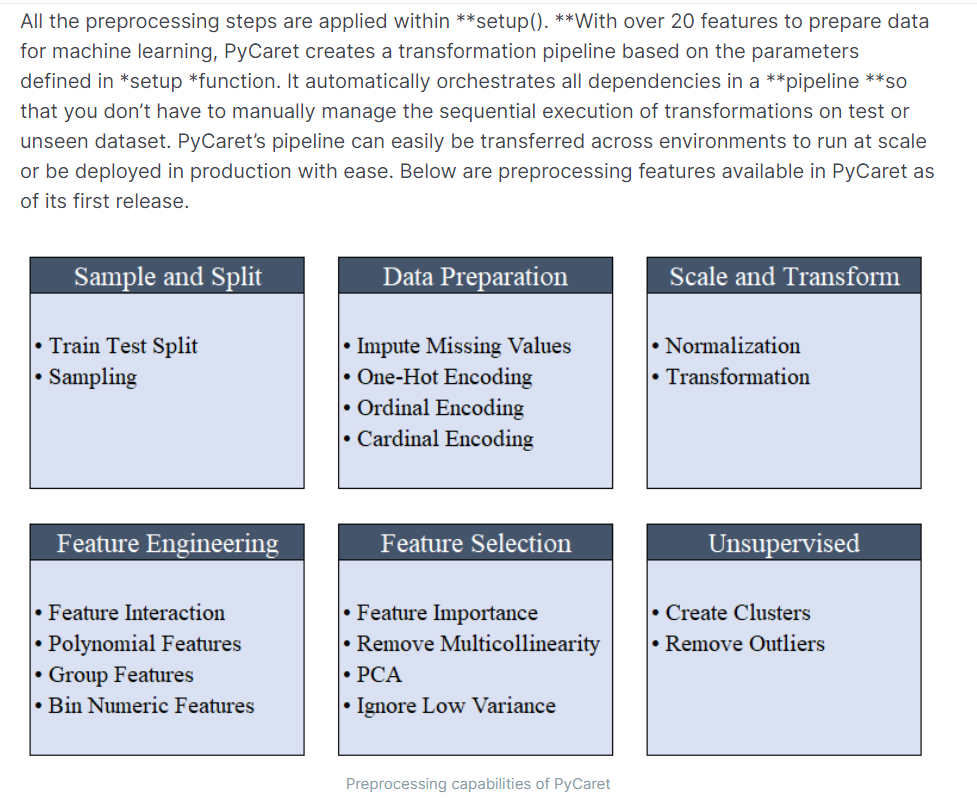

In [8]:
# PyCaret Setup command:
reg = setup(data = target_df, target = 'revenue_growth', session_id = 789, train_size = 0.80)

,Description,Value
0,session_id,789
1,Target,revenue_growth
2,Original Data,"(111, 3)"
3,Missing Values,True
4,Numeric Features,1
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(81, 81)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='revenue_growth',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_s...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Compare Models:

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [9]:
# Display all models available in PyCaret Library and abbreviation
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [10]:
# Compare models & Select top 3 performers
best_model = compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,2.9393,195.3257,7.3520,-0.2179,0.6616,1.8266,0.015
gbr,Gradient Boosting Regressor,2.9402,195.1648,7.3443,-0.2209,0.6561,1.9807,0.045
knn,K Neighbors Regressor,2.9377,195.6036,7.3686,-0.2232,0.6736,1.6584,0.063
rf,Random Forest Regressor,2.9724,196.6503,7.4340,-0.3457,0.7474,0.9853,0.410
et,Extra Trees Regressor,2.9738,196.6271,7.4375,-0.3696,0.7502,0.9753,0.578
dt,Decision Tree Regressor,2.9738,196.6264,7.4375,-0.3697,0.7502,0.9755,0.016
ada,AdaBoost Regressor,2.9738,194.1264,7.3288,-0.3776,0.6483,2.8307,0.026
huber,Huber Regressor,4.0730,192.2112,8.1219,-11.2192,1.0022,10.6201,0.048
llar,Lasso Least Angle Regression,4.2911,191.9479,8.2573,-13.3890,1.0481,11.6544,0.014
lasso,Lasso Regression,4.2969,191.9592,8.2616,-13.4676,1.0495,11.6822,0.015


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:[OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None), GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=789, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
      

Create Model:

Creating a model in any module of PyCaret is as simple as writing *create_model. ***It takes only one parameter i.e. the model name passed as string input. This function returns a table with k-fold cross validated scores and a trained model object.

In [11]:
# Creating models for each of the best estimators

omp = create_model('omp', fold =5)
print()
gbr = create_model('gbr', fold =5)
print()
knn = create_model('knn', fold =5)
print()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5423,0.4425,0.6652,-0.0435,0.3058,1.9466
1,2.8630,99.6682,9.9834,-0.0769,0.9121,1.8735
2,3.2587,114.0414,10.6790,-0.0814,0.9630,1.4601
3,7.6237,763.4617,27.6308,-0.0747,1.2084,2.2426
4,0.3937,0.3142,0.5606,-0.0065,0.2783,1.3075
Mean,2.9363,195.5856,9.9038,-0.0566,0.7335,1.7661
Std,2.6183,287.9391,9.8742,0.0284,0.3742,0.3392


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 5
INFO:logs:KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')
INFO:logs:create_model() succesfully completed......................................


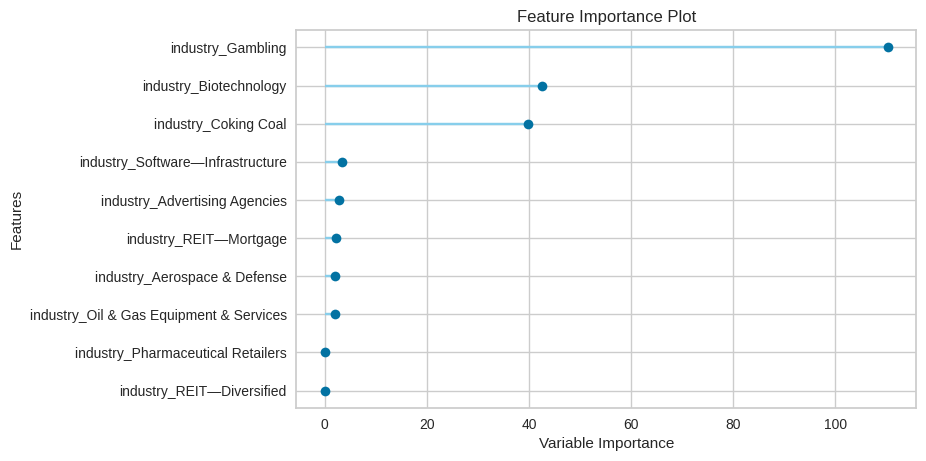

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [12]:
# Plot all parameters considered when the model is created
plot_model(omp, plot ='feature')

In [13]:
# Plot all parameters considered when the model is created
plot_model(gbr, plot ='parameter')

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,ls
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


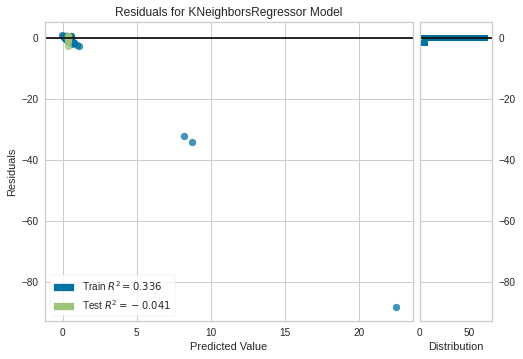

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [14]:
# Plot all parameters considered when the model is created
plot_model(knn, plot ='residuals')

Ensembling a Model:

Ensembling is a common machine learning technique used to improve the performance of models (mostly tree based). There are various techniques for ensembling, they include Bagging and Boosting. We will use the ensemble_model() function in PyCaret which ensembles the trained base estimators using the method defined in the method parameter.

In [15]:
# Ensemble Bagging (Metrics rounded to 3 decimals points) - We are using the Random Forest model here
rf = create_model('rf', round = 3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.473,0.364,0.604,-0.692,0.386,0.691
1,0.695,0.876,0.936,-0.338,0.514,0.862
2,0.527,0.829,0.910,-0.268,0.452,1.472
3,5.333,200.795,14.170,-0.164,1.305,0.715
4,5.959,229.307,15.143,-0.166,1.375,0.802
5,0.624,1.310,1.145,-0.245,0.514,1.110
6,14.526,1530.866,39.126,-0.154,1.705,1.981
7,0.755,1.340,1.157,-0.471,0.574,0.749
8,0.236,0.087,0.295,-0.000,0.166,0.865


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 6
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=789, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


Bagging Method: 

Bagging, also known as Bootstrap aggregating, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach.

In [16]:
# Bagging the trained RF model (decision tree model)
bagged_rf = ensemble_model(rf)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4610,0.3475,0.5895,-0.6138,0.3715,0.6824
1,0.6655,0.8241,0.9078,-0.2591,0.4783,0.9070
2,0.5190,0.7846,0.8858,-0.2002,0.4296,1.8797
3,5.2943,200.2525,14.1511,-0.1609,1.2830,0.7014
4,5.9221,228.7063,15.1230,-0.1630,1.3474,0.7379
5,0.6342,1.2716,1.1276,-0.2082,0.5011,1.3827
6,14.5263,1529.4970,39.1088,-0.1531,1.6860,2.4057
7,0.7276,1.2935,1.1373,-0.4205,0.5529,0.6827
8,0.2463,0.0885,0.2975,-0.0159,0.1502,1.0250


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 7
INFO:logs:BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_

Boosting Method:
 
Boosting is an ensemble meta-algorithm for primarily reducing bias and variance in supervised learning. Boosting is in the family of machine learning algorithms that convert weak learners to strong ones. A weak learner is defined to be a classifier that is only slightly correlated with the true classification (it can label examples better than random guessing). In contrast, a strong learner is a classifier that is arbitrarily well-correlated with the true classification.

In [17]:
# Ensembling by using the Boostraping method:

boosted_rf = ensemble_model(rf, method="Boosting")
print()
print(boosted_rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4493,0.3232,0.5685,-0.5008,0.3497,0.7105
1,0.6885,0.8642,0.9296,-0.3204,0.5063,0.8710
2,0.5190,0.6613,0.8132,-0.0115,0.3887,4.0565
3,5.2765,200.0037,14.1423,-0.1595,1.2736,0.6953
4,5.8907,228.0006,15.0997,-0.1594,1.3178,0.7337
5,0.6350,1.2685,1.1263,-0.2053,0.5001,1.4053
6,14.5363,1527.3118,39.0808,-0.1515,1.6585,3.1268
7,0.6979,1.1053,1.0513,-0.2138,0.4728,0.8482
8,0.2813,0.1095,0.3308,-0.2565,0.1462,1.4741


INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 8
INFO:logs:AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weig


AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                   

Blending:

Blending is another common technique for ensembling that can be used in PyCaret. It creates multiple models and then averages the individual predictions to form a final prediction.

In [18]:
# Blending models:

blender = blend_models(estimator_list=[omp,gbr,knn])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4032,0.2168,0.4656,-0.0070,0.2464,1.3369
1,0.6418,0.7010,0.8373,-0.0711,0.3887,1.3649
2,0.5190,0.6788,0.8239,-0.0383,0.3891,3.4907
3,5.2071,198.1890,14.0780,-0.1489,1.2151,0.8651
4,5.8467,226.5078,15.0502,-0.1518,1.2631,0.8065
5,0.6766,1.1416,1.0685,-0.0848,0.4666,2.5585
6,14.5618,1524.4309,39.0440,-0.1493,1.6271,4.1322
7,0.6979,1.0707,1.0347,-0.1758,0.4595,0.9181
8,0.3391,0.1573,0.3966,-0.8060,0.1867,2.0115


INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 9
INFO:logs:VotingRegressor(estimators=[('omp',
                             OrthogonalMatchingPursuit(fit_intercept=True,
                                                       n_nonzero_coefs=None,
                                                       normalize=True,
                                                       precompute='auto',
                                                       tol=None)),
                            ('gbr',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=

In [19]:
# Tune the Blender model with 25 iterations:
tuned_blender = tune_model(blender, n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4092,0.2239,0.4731,-0.0396,0.2513,1.4541
1,0.6418,0.7060,0.8402,-0.0787,0.3925,1.3334
2,0.5190,0.6833,0.8266,-0.0453,0.3900,3.3809
3,5.2071,198.2839,14.0813,-0.1495,1.2177,0.8443
4,5.8486,226.5911,15.0529,-0.1522,1.2658,0.8004
5,0.6734,1.1495,1.0721,-0.0922,0.4680,2.4689
6,14.5592,1524.7262,39.0477,-0.1495,1.6300,4.0288
7,0.6979,1.0792,1.0389,-0.1852,0.4627,0.9001
8,0.3300,0.1480,0.3847,-0.6986,0.1785,1.9265


INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 10
INFO:logs:VotingRegressor(estimators=[('omp',
                             OrthogonalMatchingPursuit(fit_intercept=True,
                                                       n_nonzero_coefs=None,
                                                       normalize=True,
                                                       precompute='auto',
                                                       tol=None)),
                            ('gbr',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features

Analyze Model:

This function analyzes the performance of a trained model on the test set.

In [20]:
# Analyze Tuned Blender Model:
evaluate_model(tuned_blender)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=VotingRegressor(estimators=[('omp',
                             OrthogonalMatchingPursuit(fit_intercept=True,
                                                       n_nonzero_coefs=None,
                                                       normalize=True,
                                                       precompute='auto',
                                                       tol=None)),
                            ('gbr',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                  

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Predict Model:

So far the results we have seen are based on k-fold(5-fold) cross validation on training dataset only. In order to see the predictions and performance of the model on the test / hold-out dataset, the predict_model function is used.

In [22]:
# The predict_model() can be executed with the final blender over the entire dataset and saved
pred_final_blender = predict_model(blender, data = target_df)
pred_final_blender.describe()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=VotingRegressor(estimators=[('omp',
                             OrthogonalMatchingPursuit(fit_intercept=True,
                                                       n_nonzero_coefs=None,
                                                       normalize=True,
                                                       precompute='auto',
                                                       tol=None)),
                            ('gbr',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                    

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0,0,0,0,0,0


,revenue_growth,ROI,Label
count,102.000000,104.000000,111.000000
mean,2.450174,4.220424,1.752072
std,12.270792,39.786276,8.597469
min,-0.847000,-1.266653,0.022483
25%,0.137716,-0.077181,0.392018
50%,0.345625,0.063970,0.409328
75%,0.822250,0.303067,0.431773
max,110.765750,405.920777,81.164796


In [23]:
pred_final_blender= pred_final_blender[['industry','ROI','revenue_growth','Label']]
pred_final_blender.to_csv('Revenue_Growth_Label.csv',index = False)
pred_final_blender.sample(10)

,industry,ROI,revenue_growth,Label
109,Security & Protection Services,0.015610,0.143000,0.409328
45,Tobacco,4.063769,0.014500,0.409328
17,Medical Care Facilities,0.229273,0.769250,0.409328
94,Consumer Electronics,0.617487,-0.385000,0.409328
7,REIT—Retail,0.089579,0.361667,0.409328
61,Electronic Components,0.419569,-0.161000,0.409328
108,Railroads,NaN,NaN,0.409328
43,Metal Fabrication,-0.245691,0.250000,0.409328
12,Specialty Retail,-0.086712,0.865909,0.409328
26,Information Technology Services,0.047168,0.254889,0.409328
